In [128]:
import pandas as pd
import scipy as sp
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv("Data_A.txt", sep='    ', header=None, usecols=[0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [99]:
df

,0,1
0,0.14118,0.025502
1,-0.79154,0.025445
2,0.42274,1.018100
3,0.20876,-0.288760
4,1.19120,0.383510
...,...,...
995,0.44068,0.563880
996,0.30488,-0.181970
997,1.25930,0.017628
998,1.12040,-0.105200


## Задание 1

#### пункт 1

по формуле $\frac{n^{\frac{1}{3}}}{2}$ при 1000 строк получаем $k = 5$ (и это кринж)

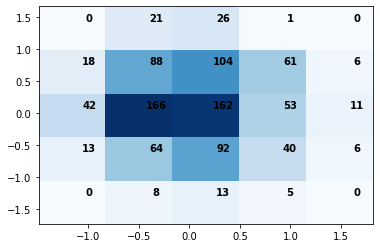

In [114]:
k = 5
hist, xbins, ybins, im = plt.hist2d(df[0], df[1], bins=k, cmap='Blues')
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        plt.text(xbins[j]+0.5,ybins[i]+0.5, int(hist.T[i,j]), 
                color="k", ha="center", va="center", fontweight="bold")

In [124]:
stat, p, dof, garb = st.chi2_contingency(hist)
p

0.0013793302370199627

#### пункт 2

In [83]:
coef, p = st.spearmanr(df[0], df[1])
corr, _ = st.pearsonr(df[0], df[1])

In [85]:
print(coef, p, corr, _, sep='\n')

-0.03174930822554785
0.3158616269449295
-0.03618320814722287
0.2529735138640905


## Задание 2

#### пункт 1

In [86]:
st.ks_2samp(df[0], df[1])

Ks_2sampResult(statistic=0.06, pvalue=0.05462666510701526)

p-value ~ 0.05, то есть законы распределения совпадают

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

#### пункт 2

In [117]:
df['abs_0'] = df[0].apply(lambda x: np.abs(x))
df['abs_1'] = df[1].apply(lambda x: np.abs(x))

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


,sumsquare_error,aic,bic,kl_div
gompertz,4.424782,261.672529,-5399.811066,inf
gengamma,4.458176,255.214185,-5385.384524,inf
foldnorm,4.458285,258.127393,-5392.267848,inf
chi,4.461489,246.762113,-5391.549490,inf
halfnorm,4.467187,249.623283,-5397.180862,inf


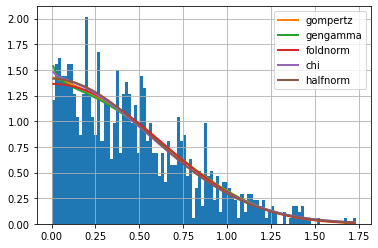

In [119]:
height = df['abs_1'].values
f = Fitter(height,
           distributions = get_distributions())
f.fit()
f.summary()

In [120]:
f.get_best(method = 'sumsquare_error')

{'gompertz': {'c': 1.3180918201759486,
  'loc': 0.001128996099488075,
  'scale': 0.9223506918742566}}

In [127]:
f.fitted_param["halfnorm"]

(0.0011289901551100243, 0.5640719254238459)

{'halfnorm': {'loc': 0.0011289901551100243, 'scale': 0.5640719254238459}}

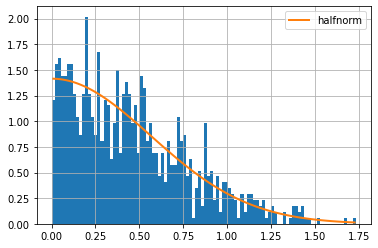

In [130]:
height = df['abs_1'].values
f1 = Fitter(height,
           distributions = ['halfnorm'])
f1.fit()
f1.summary()
f1.get_best(method = 'sumsquare_error')